In [1]:
# Loading libraries
%matplotlib inline
import os
import os.path
from netCDF4 import Dataset
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import fnmatch
from cycler import cycler
import pandas as pd
from pandas import read_csv, to_datetime, DataFrame
import datetime
import time
import matplotlib.dates as mdates

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap # Basemap pour les cartes

In [2]:
filepath = '../DATA/COMPAR_SAT/'
full_list = os.listdir(filepath)

# Now we'll want to read txt files produced by our Matlab script computing means based on sat images of surf chla 
# over some Med regions

region_names = [] # all_regions
region_names2 = [] # no "_MOD" regions

for file in full_list:
    if file != 'date.txt':
        var_name = file[9:-4]
        vars()[var_name+'_df'] = pd.read_table(filepath+file, header=None, sep=',')
        vars()[var_name+'_df'] = vars()[var_name+'_df'] .transpose()
        region_names = np.append(region_names, var_name)
            
        if var_name[-4:] != '_MOD':
            region_names2 = np.append(region_names2, var_name)
            
np.shape(GOL_df)
#GOL_df.head(20)

#region_names3 = ['ALL_MED', 'ALL_MED_MOD', 'W', 'W_MOD', 'GOL', 'GOL_MOD'] # 12/07

region_names3 = ['ALL_MED', 'ALL_MED_MOD', 'W', 'W_MOD', 'GOL', 'GOL_MOD', 'ALG', 'ALG_MOD', 'EnoAA', 'EnoAA_MOD',\
                 'ION', 'ION_MOD', 'LEV', 'LEV_MOD'] 
                 
date_1d = pd.date_range("20030602", freq='1D',periods=3666)

##

year_list = np.arange(2004,2013)

for region in region_names3: # 12/07
    vars()[region+'_series'] = pd.DataFrame(date_1d, columns=['date'])
    vars()[region+'_series']['var'] = vars()[region+'_df'][0]
    vars()[region+'_series']['date'] = pd.to_datetime(vars()[region+'_series']['date'],format='%Y-%m-%d')
    vars()[region+'_series']['interp'] = pd.Series.interpolate(vars()[region+'_series']['var']) # method=linear
    vars()[region+'_series']['mm'] = pd.DatetimeIndex(vars()[region+'_series']['date']).month
    vars()[region+'_series']['yy'] = pd.DatetimeIndex(vars()[region+'_series']['date']).year
    
    vars()['man_df_'+region] = np.zeros([365,11])
    vars()['man_df_'+region][:] = np.nan
    vars()['man_df_'+region] = pd.DataFrame(vars()['man_df_'+region], columns=['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
                                          '2011', '2012', '2013'])

    all_len = np.zeros([len(year_list)])
    all_len[:] = np.nan

    for year in year_list:
        vars()['our_df_'+region] = vars()[region+'_series'].loc[vars()[region+'_series']['yy'] == year]
        all_len[year-year_list[0]] = len(vars()['our_df_'+region])
    print ' '
    print all_len

    for year in year_list:
        vars()['temp_df_'+region] = vars()[region+'_series'].loc[vars()[region+'_series']['yy'] == year]
        vars()[region+'_df_'+str(year)] = np.zeros([365])
        vars()[region+'_df_'+str(year)][:] = np.nan

        if all_len[year-year_list[0]] == 366:
            print year
            vars()['new_df_'+region] = vars()['temp_df_'+region].drop(vars()['temp_df_'+region].index[59])
            vars()[region+'_df_'+str(year)][:] = vars()['new_df_'+region]['interp']
            vars()['man_df_'+region][str(year)] = vars()[region+'_df_'+str(year)]

        else:
            vars()[region+'_df_'+str(year)][:] = vars()['temp_df_'+region]['interp']
            vars()['man_df_'+region][str(year)] = vars()[region+'_df_'+str(year)]
    
    year_list2 = [2003]
    #c = 0

    for year in year_list2:
        vars()[region+'_df_'+str(year)] = np.zeros([365])
        vars()[region+'_df_'+str(year)] = np.nan
        vars()['temp_df_'+region] = vars()[region+'_series'].loc[vars()[region+'_series']['yy'] == year]

    vars()['man_df_'+region]['2003'][152:] = vars()['temp_df_'+region]['interp']

    year_list2 = [2013]
    #c = 0

    for year in year_list2:
        vars()[region+'_df_'+str(year)] = np.zeros([365])
        vars()[region+'_df_'+str(year)] = np.nan
        vars()['temp_df_'+region] = vars()[region+'_series'].loc[vars()[region+'_series']['yy'] == year]

    vars()['man_df_'+region]['2013'][0:165] = vars()['temp_df_'+region]['interp']
    print region
    
print ' '
print 'END OF COMPUTING'

 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
ALL_MED
 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
ALL_MED_MOD
 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
W
 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
W_MOD
 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
GOL
 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
GOL_MOD
 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
ALG
 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
ALG_MOD
 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
EnoAA
 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
EnoAA_MOD
 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
ION
 
[ 366.  365.  365.  365.  366.  365.  365.  365.  366.]
2004
2008
2012
ION_MOD
 
[ 366.  365.  365.  365.  366.  365.  365.

In [27]:
man_df_ALL_MED.head()

2003      2004      2005      2006      2007      2008      2009      2010  \
0   NaN  0.317704  0.297604  0.270334  0.286912  0.345754  0.289290  0.243710   
1   NaN  0.341792  0.315870  0.279300  0.269730  0.343150  0.278568  0.240346   
2   NaN  0.365880  0.308750  0.272692  0.283568  0.332178  0.267846  0.236982   
3   NaN  0.357544  0.301630  0.266084  0.297406  0.321206  0.257124  0.233618   
4   NaN  0.349208  0.294510  0.259476  0.311244  0.310234  0.246402  0.230254   

      2011     2012     2013      mean  day  
0  0.31620  0.37029  0.25672  0.299452    1  
1  0.31342  0.35340  0.25993  0.299551    2  
2  0.31064  0.33651  0.26314  0.297819    3  
3  0.30786  0.31962  0.26635  0.292844    4  
4  0.30508  0.30273  0.26956  0.287870    5

In [4]:
W_series.head(n=15)

date       var    interp  mm    yy
0  2003-06-02  0.110530  0.110530   6  2003
1  2003-06-03       NaN  0.112186   6  2003
2  2003-06-04       NaN  0.113842   6  2003
3  2003-06-05       NaN  0.115498   6  2003
4  2003-06-06       NaN  0.117154   6  2003
5  2003-06-07  0.118810  0.118810   6  2003
6  2003-06-08       NaN  0.113553   6  2003
7  2003-06-09       NaN  0.108296   6  2003
8  2003-06-10       NaN  0.103040   6  2003
9  2003-06-11       NaN  0.097783   6  2003
10 2003-06-12  0.092526  0.092526   6  2003
11 2003-06-13       NaN  0.101131   6  2003
12 2003-06-14       NaN  0.109736   6  2003
13 2003-06-15       NaN  0.118340   6  2003
14 2003-06-16       NaN  0.126945   6  2003

In [3]:
# Computing a mean annual cycle
# Don't execute more than once!!! (else means become wrong)

for region in region_names3: # 12/07
    print region
    vars()[region+'_nanmean'] = np.zeros([365]) # preallocating the mean array
    
    for i in np.arange(1, len(vars()['man_df_'+region])+1):
        moy_temp = np.nanmean(vars()['man_df_'+region][i-1:i])
        vars()[region+'_nanmean'][i-1] = moy_temp
        moy_temp = None
    
    vars()['man_df_'+region]['mean'] = vars()[region+'_nanmean']
    vars()['man_df_'+region]['day'] = np.arange(1, 366)

ALL_MED
ALL_MED_MOD
W
W_MOD
GOL
GOL_MOD
ALG
ALG_MOD
EnoAA
EnoAA_MOD
ION
ION_MOD
LEV
LEV_MOD


In [38]:
region_names2

array(['GOL', 'EnoAA', 'ALL_MED', 'ALG', 'LEV', 'ION', 'W'], 
      dtype='|S32')

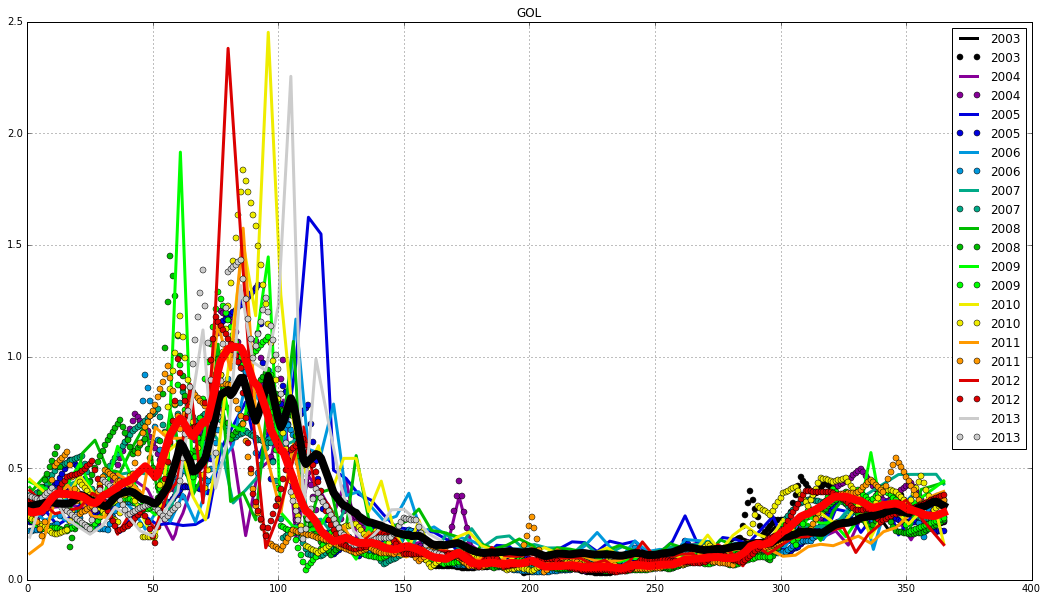

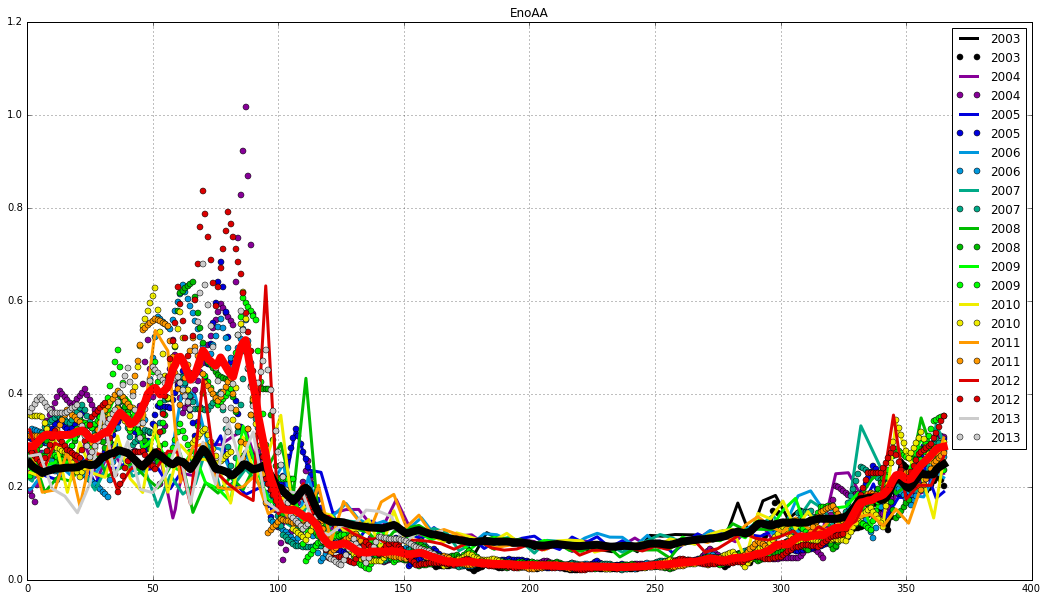

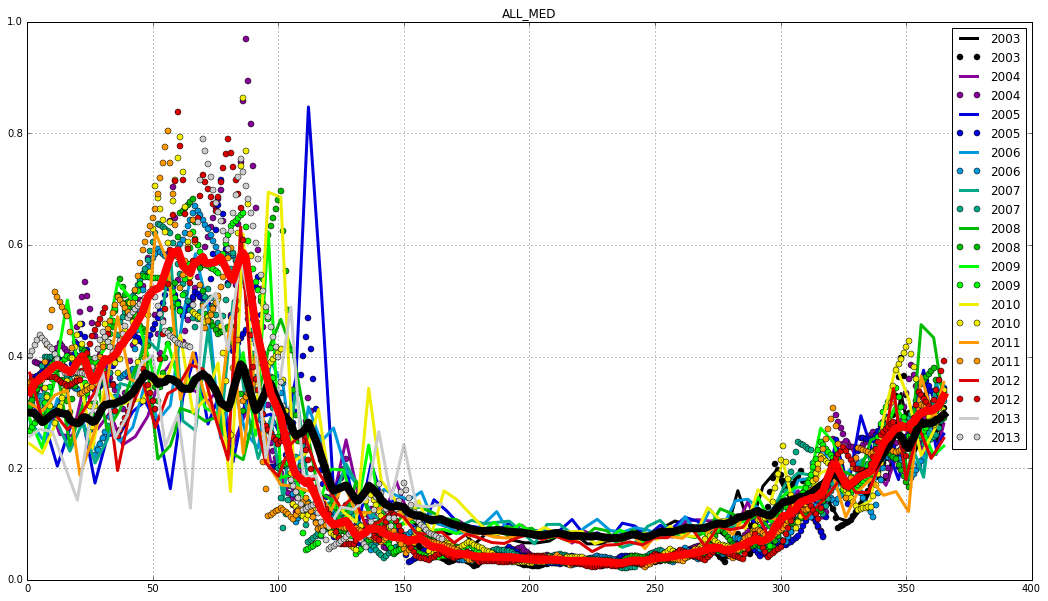

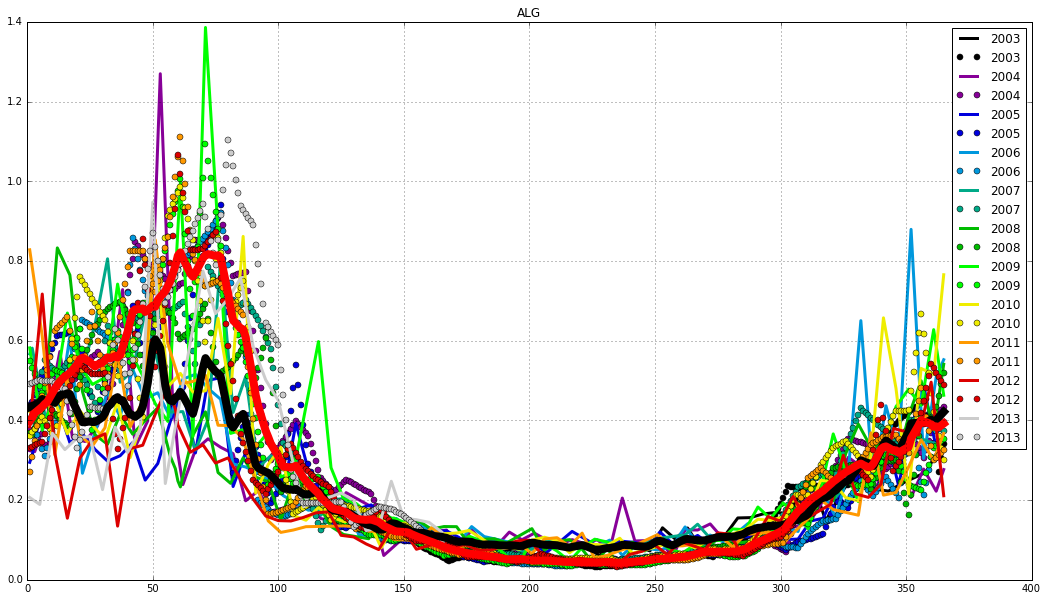

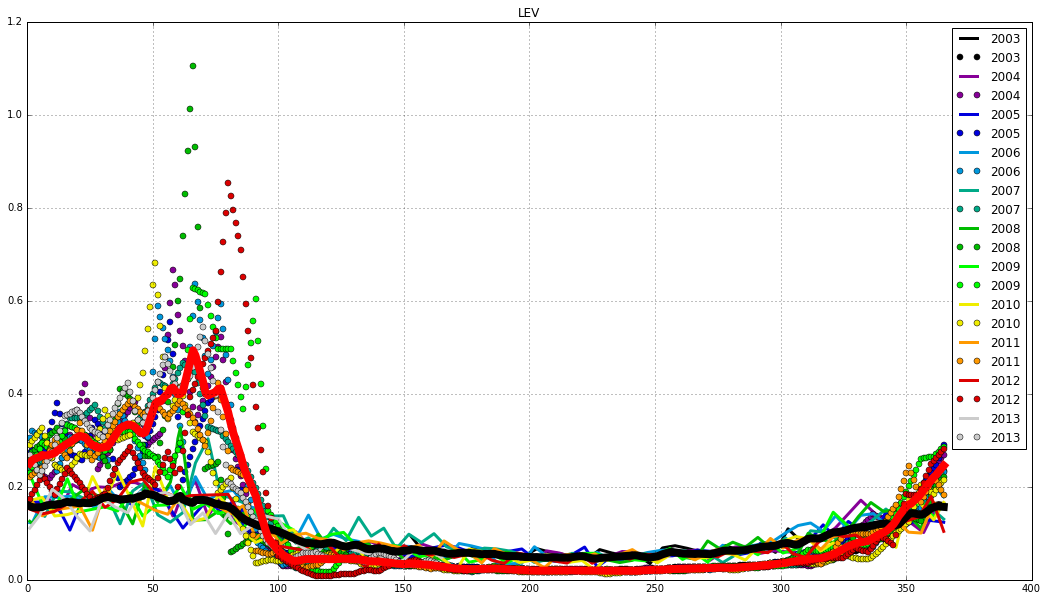

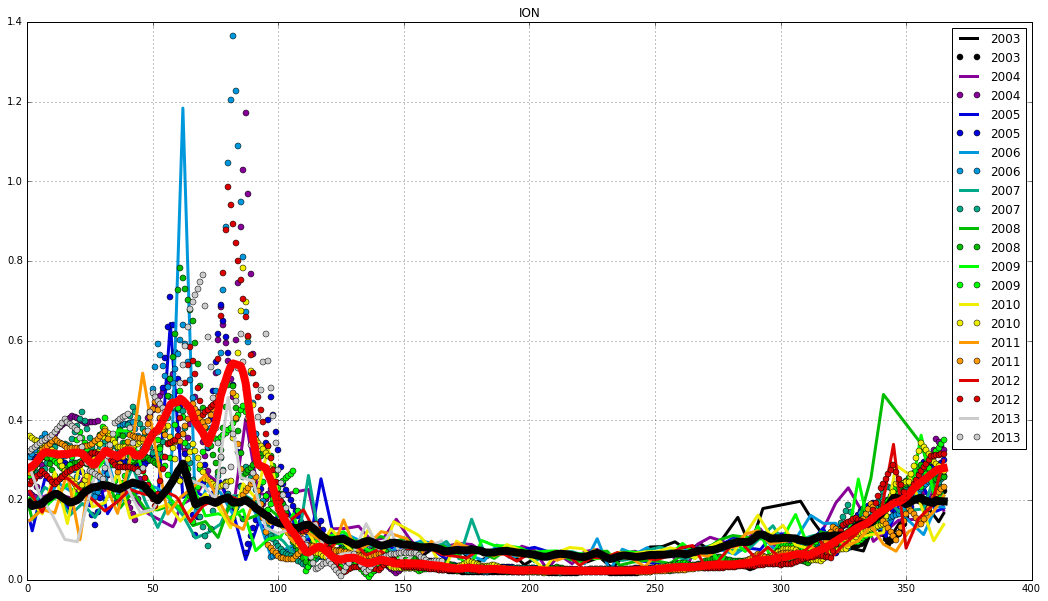

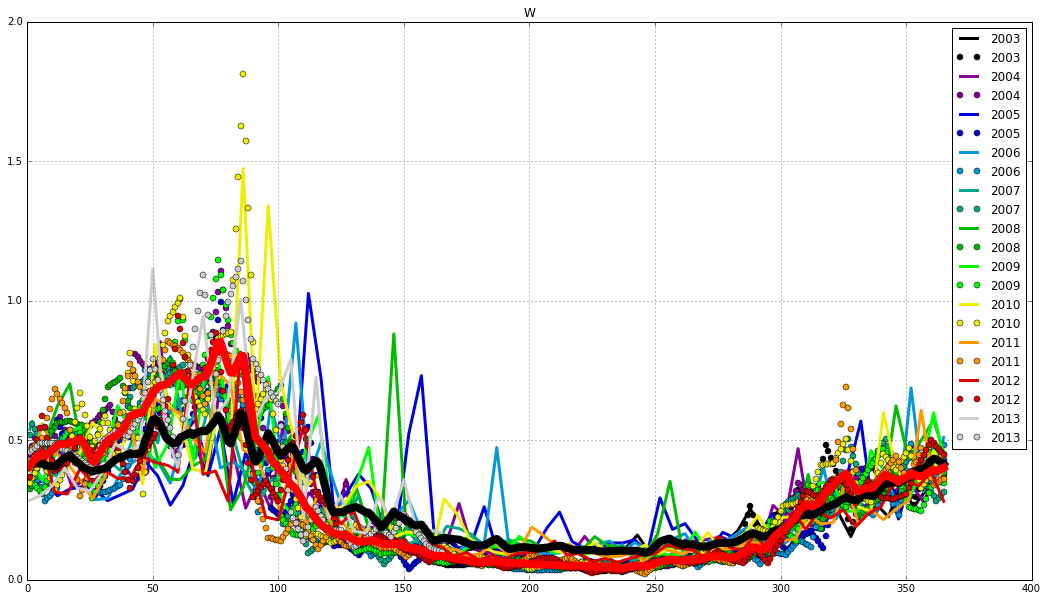

In [4]:
## FIG ANNUAL MEAN CYCLES

region_names4 = ['ALL_MED', 'W', 'GOL']

#for region in region_names4: # 12/07
for region in region_names2:
    year_list = np.arange(2003,2014)
    spectr_col = plt.get_cmap('nipy_spectral')
    our_colormap = iter(spectr_col(np.linspace(0, 1, len(year_list))))
    plt.figure(figsize=[18,10])

    for year in year_list:    
        temp_col = next(our_colormap)
        plt.plot(vars()['man_df_'+region]['day'], vars()['man_df_'+region][str(year)], color=temp_col,label=str(year), linewidth=3)
        plt.plot(vars()['man_df_'+region]['day'], vars()['man_df_'+region+'_MOD'][str(year)],'o',color=temp_col) #,marker='.'
        plt.grid(True)
        plt.legend()

    plt.plot(vars()['man_df_'+region]['day'], vars()['man_df_'+region]['mean'], '-k',label='mean', linewidth=8)
    plt.plot(vars()['man_df_'+region+'_MOD']['day'], vars()['man_df_'+region+'_MOD']['mean'], '-r',label='mean MOD', linewidth=8)
    plt.title(region)

In [5]:
# Calcul des anomalies

for region in region_names3:
    # preallocating arrays
    vars()['anom_df_'+region] = np.zeros([365,11])
    vars()['anom_df_'+region][:] = np.nan
    vars()['anom_df_'+region] = pd.DataFrame(vars()['anom_df_'+region], columns=['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
                                          '2011', '2012', '2013'])

    year_list = np.arange(2003,2014)

    for year in year_list:
        for d in np.arange(0,365):
            if np.isnan(vars()['man_df_'+region][str(year)][d]) == False:
                anom_temp = (vars()['man_df_'+region][str(year)][d])-(vars()['man_df_'+region]['mean'][d])
                vars()['anom_df_'+region][str(year)][d] = anom_temp
                anom_temp = None

In [7]:
man_df_ALL_MED.head()

2003      2004      2005      2006      2007      2008      2009      2010  \
0   NaN  0.317704  0.297604  0.270334  0.286912  0.345754  0.289290  0.243710   
1   NaN  0.341792  0.315870  0.279300  0.269730  0.343150  0.278568  0.240346   
2   NaN  0.365880  0.308750  0.272692  0.283568  0.332178  0.267846  0.236982   
3   NaN  0.357544  0.301630  0.266084  0.297406  0.321206  0.257124  0.233618   
4   NaN  0.349208  0.294510  0.259476  0.311244  0.310234  0.246402  0.230254   

      2011     2012     2013  
0  0.31620  0.37029  0.25672  
1  0.31342  0.35340  0.25993  
2  0.31064  0.33651  0.26314  
3  0.30786  0.31962  0.26635  
4  0.30508  0.30273  0.26956

In [12]:
anom_df_ALL_MED.head()

2003      2004      2005      2006      2007      2008      2009      2010  \
0   NaN  0.018252 -0.001848 -0.029118 -0.012540  0.046302 -0.010162 -0.055742   
1   NaN  0.042241  0.016319 -0.020251 -0.029821  0.043599 -0.020983 -0.059205   
2   NaN  0.068061  0.010931 -0.025127 -0.014251  0.034359 -0.029973 -0.060837   
3   NaN  0.064700  0.008786 -0.026760  0.004562  0.028362 -0.035720 -0.059226   
4   NaN  0.061338  0.006640 -0.028394  0.023374  0.022364 -0.041468 -0.057616   

       2011      2012      2013  
0  0.016748  0.070838 -0.042732  
1  0.013869  0.053849 -0.039621  
2  0.012821  0.038691 -0.034679  
3  0.015016  0.026776 -0.026494  
4  0.017210  0.014860 -0.018310

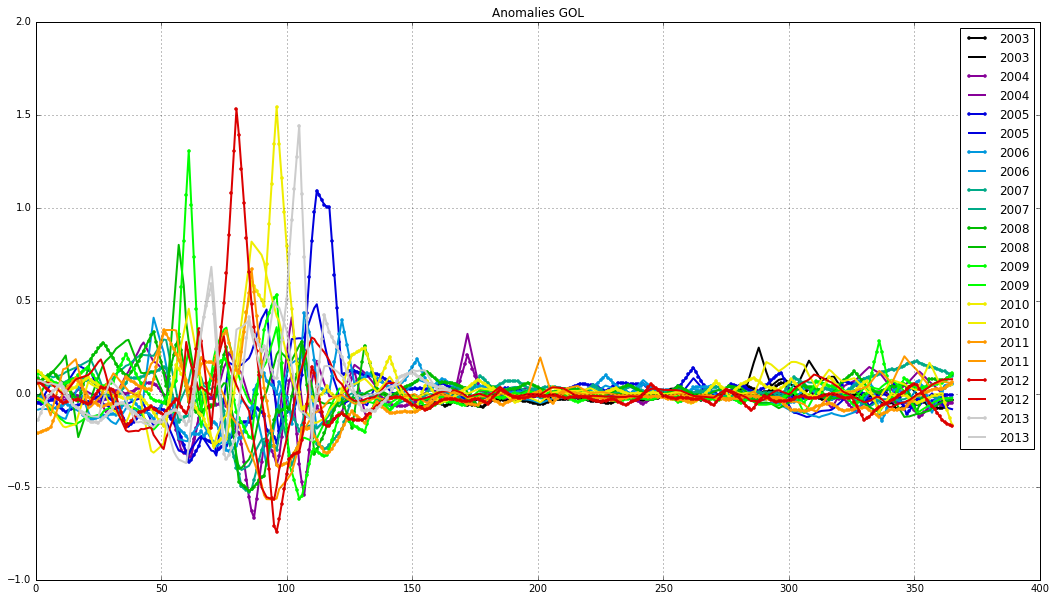

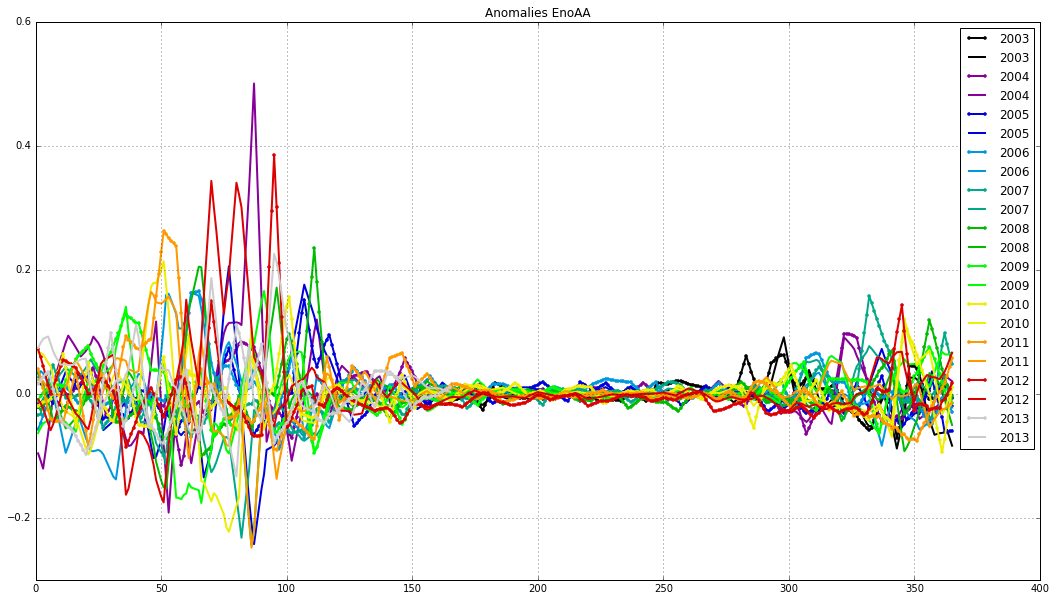

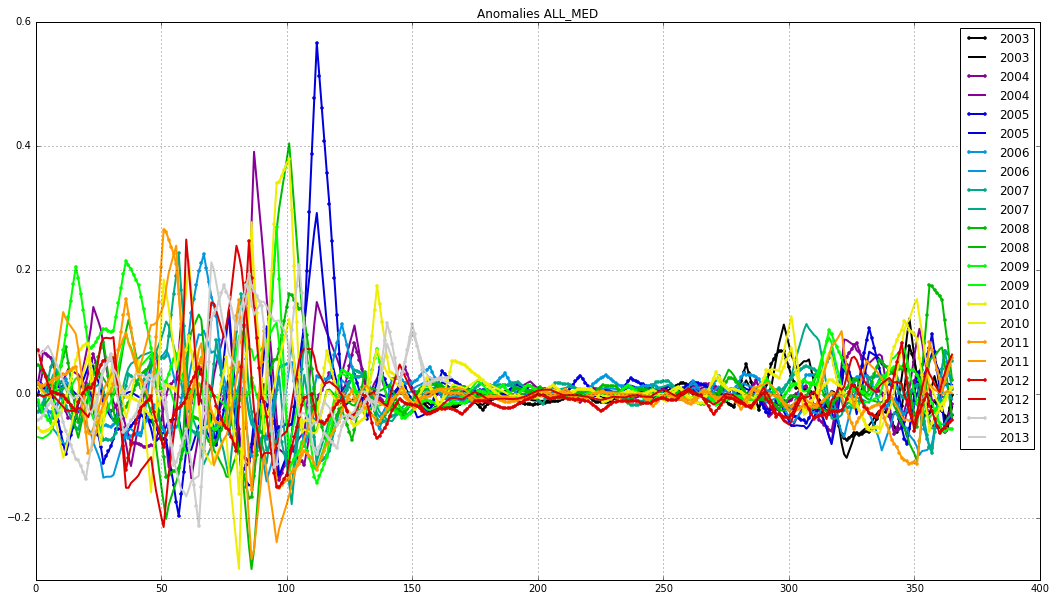

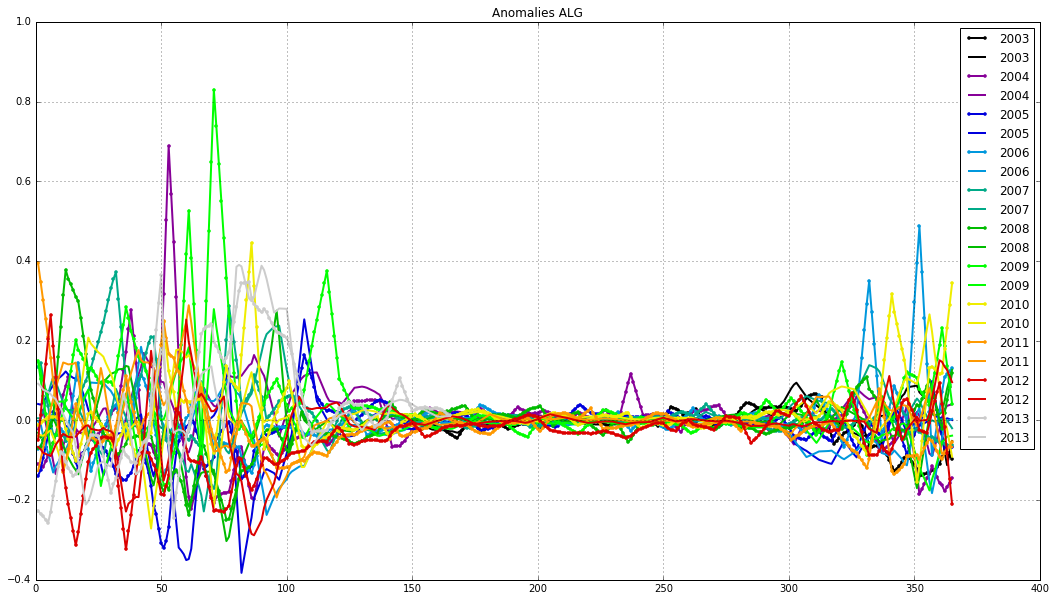

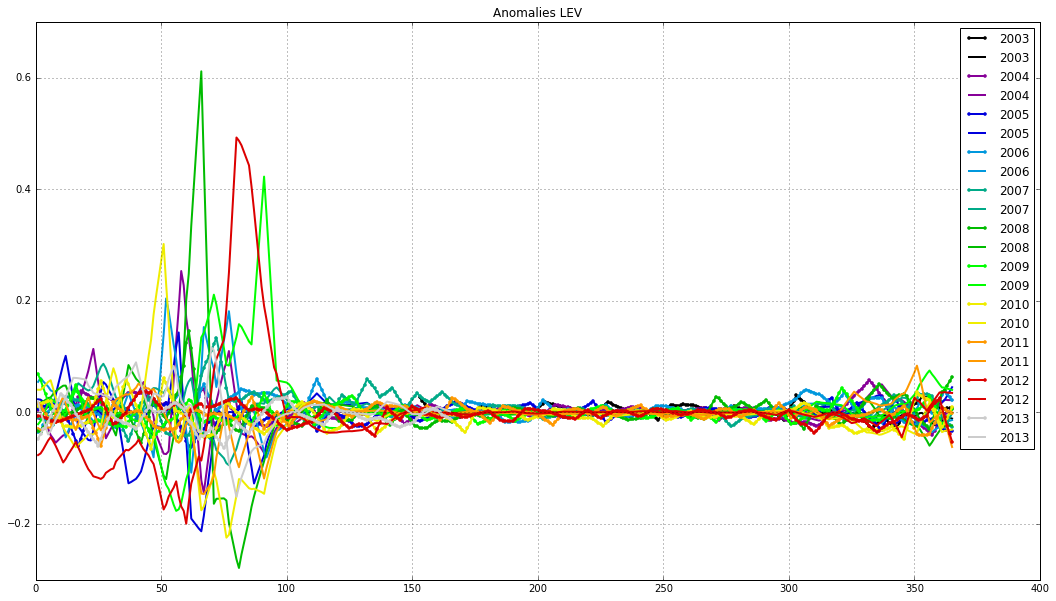

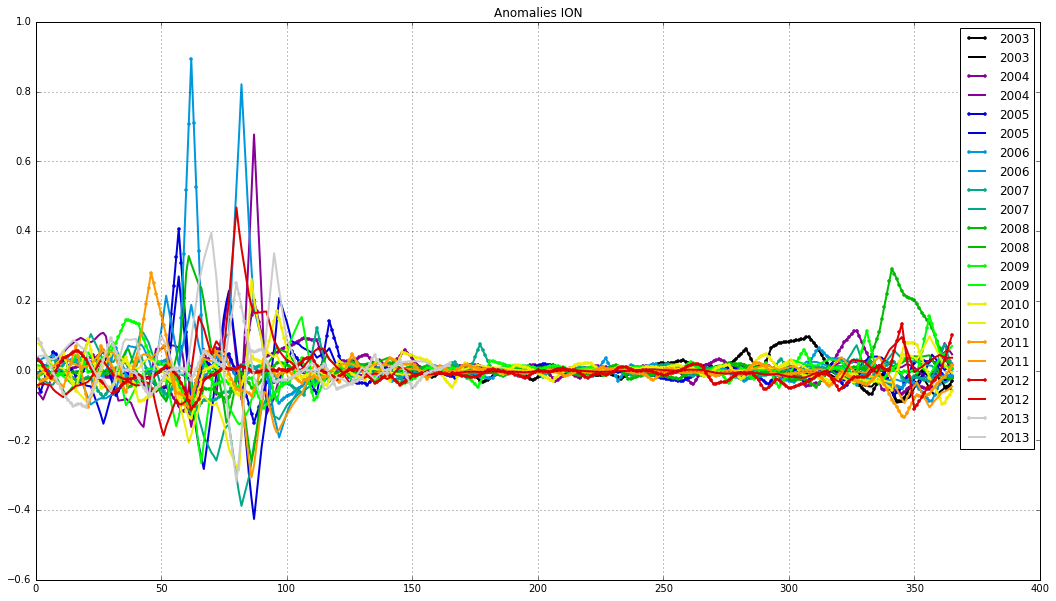

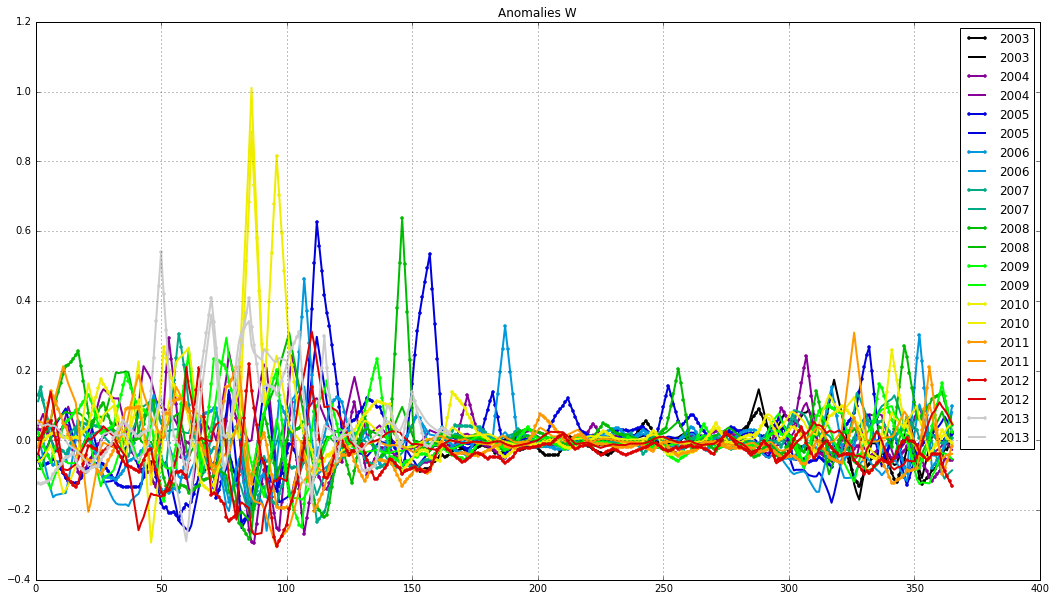

In [6]:
#for region in region_names4:
for region in region_names2: # 12/07
    year_list = np.arange(2003,2014)
    spectr_col = plt.get_cmap('nipy_spectral')
    our_colormap = iter(spectr_col(np.linspace(0, 1, len(year_list))))
    plt.figure(figsize=[18,10])

    for year in year_list:    
        temp_col = next(our_colormap)
        plt.plot(vars()['man_df_'+region]['day'], vars()['anom_df_'+region][str(year)], color=temp_col,label=str(year), linewidth=2, marker='.')
        plt.plot(vars()['man_df_'+region]['day'], vars()['anom_df_'+region+'_MOD'][str(year)], color=temp_col,label=str(year), linewidth=2)
        plt.grid(True)
        plt.legend()
    plt.title('Anomalies '+region)

In [9]:
region_names2

array(['GOL', 'EnoAA', 'ALL_MED', 'ALG', 'LEV', 'ION', 'W'], 
      dtype='|S32')

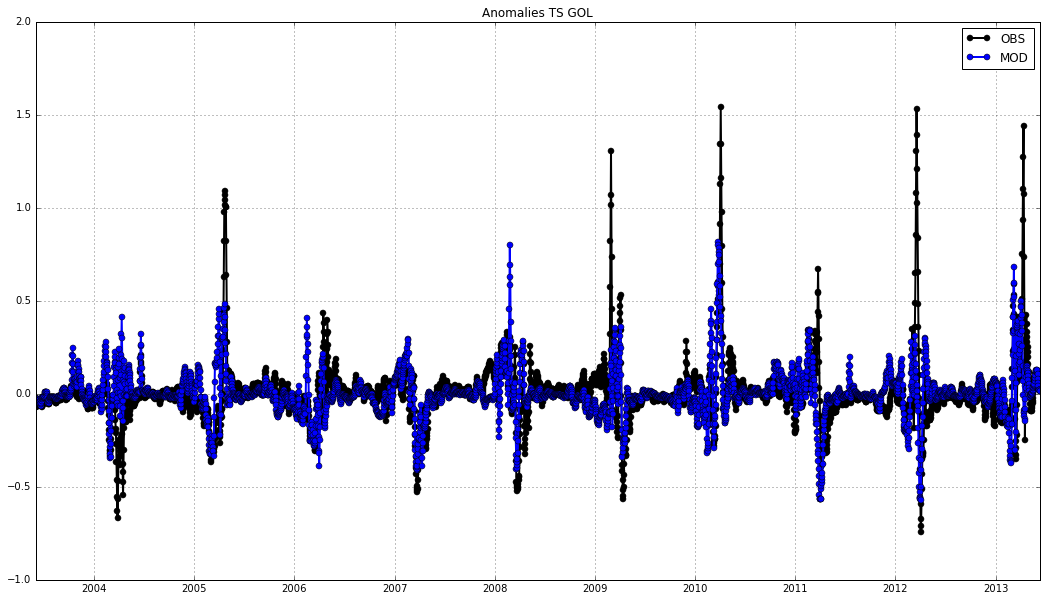

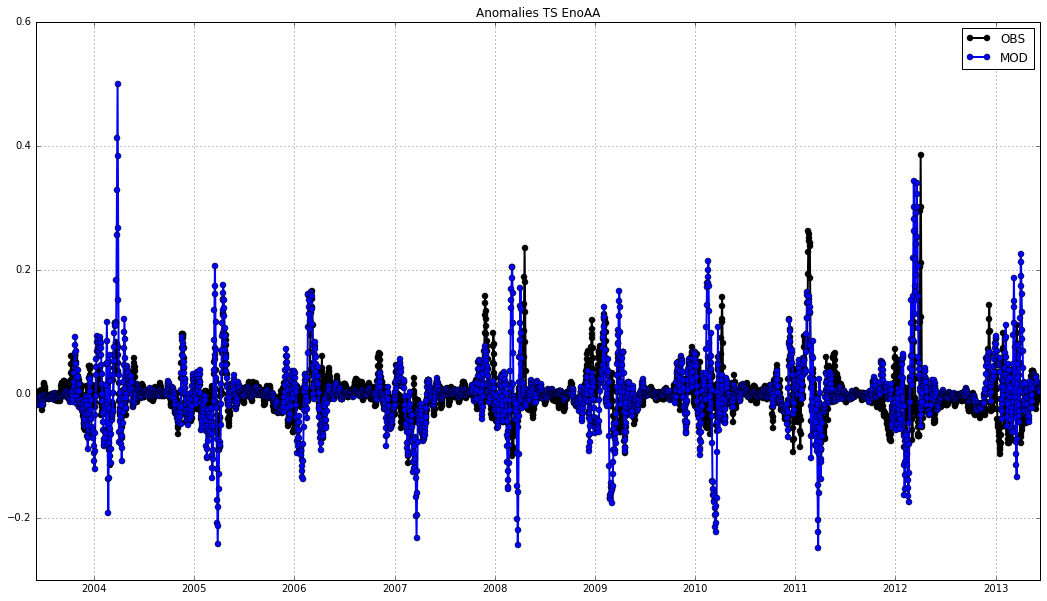

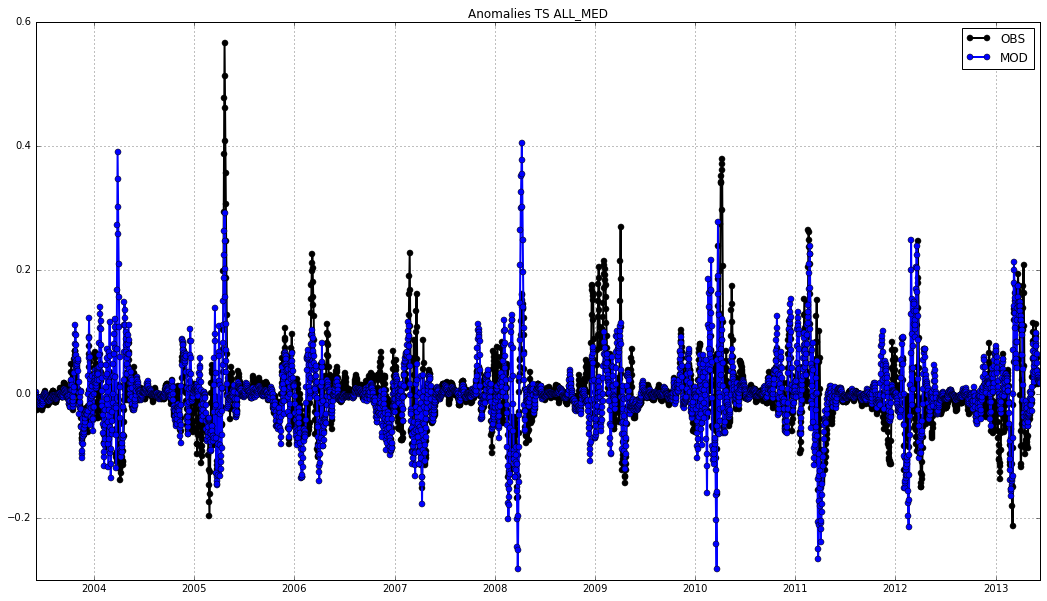

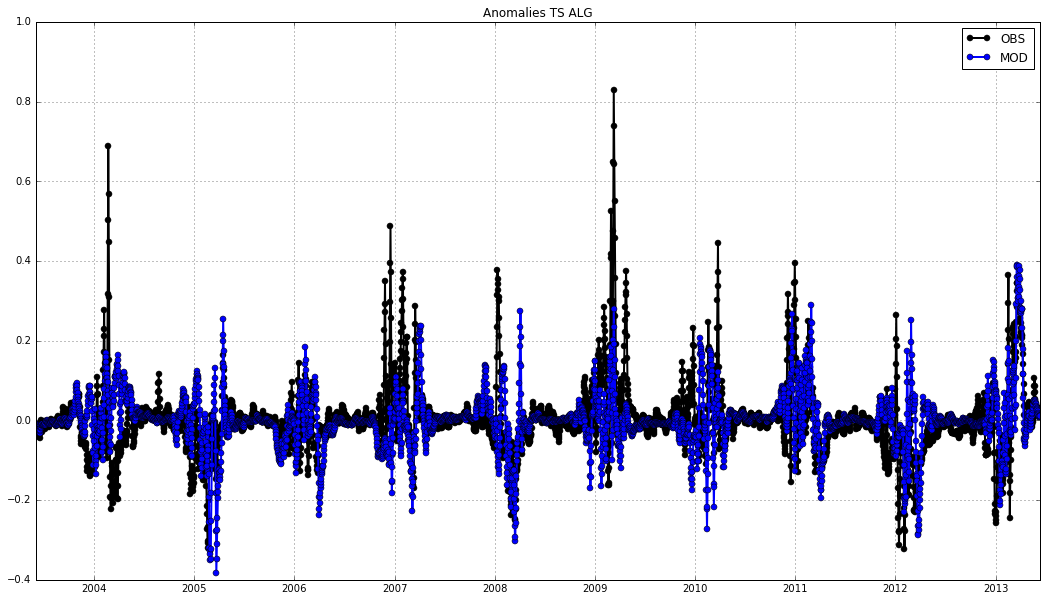

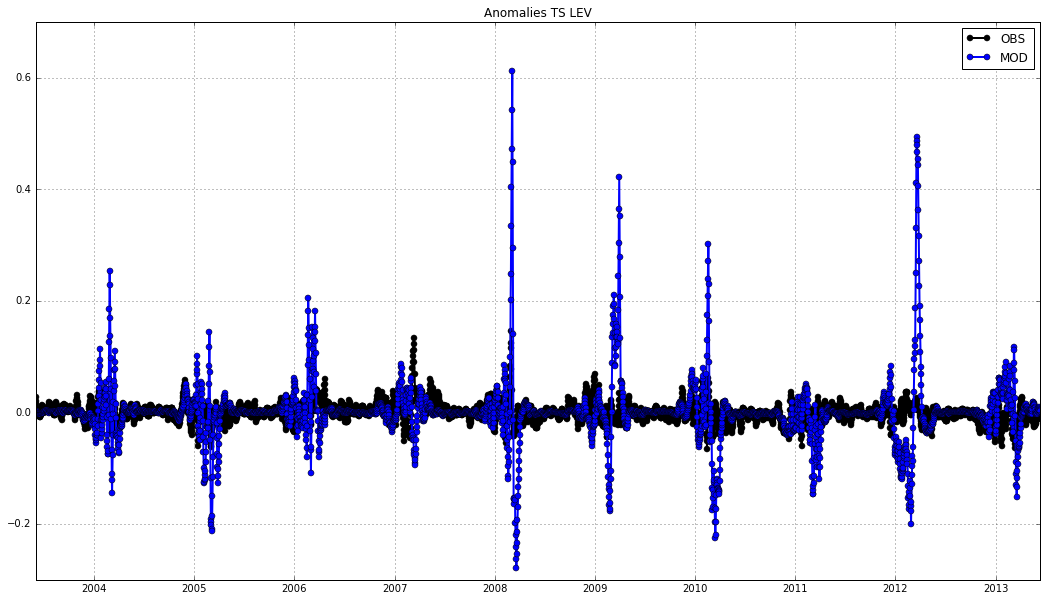

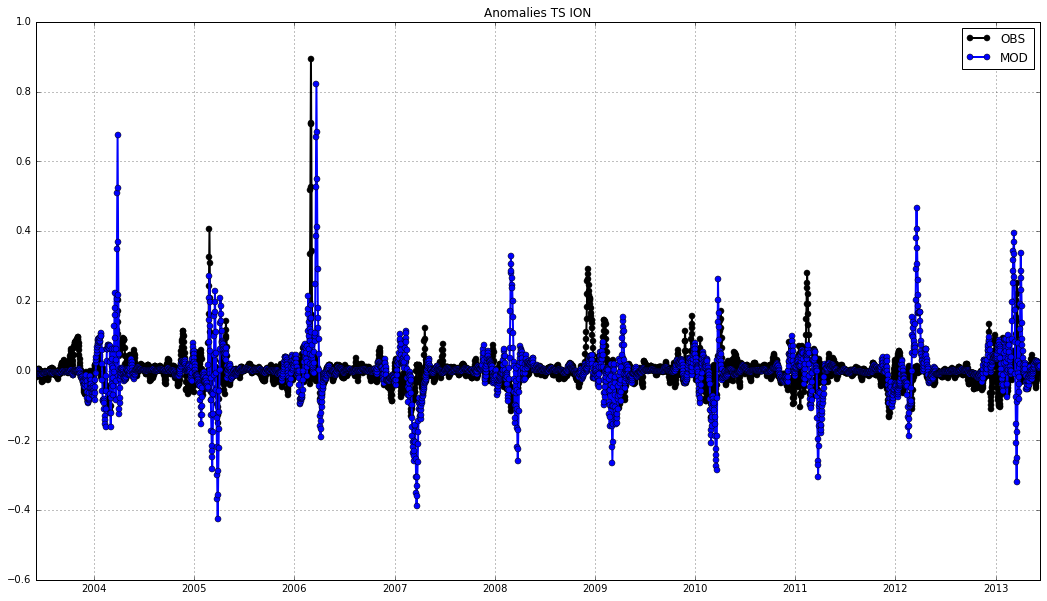

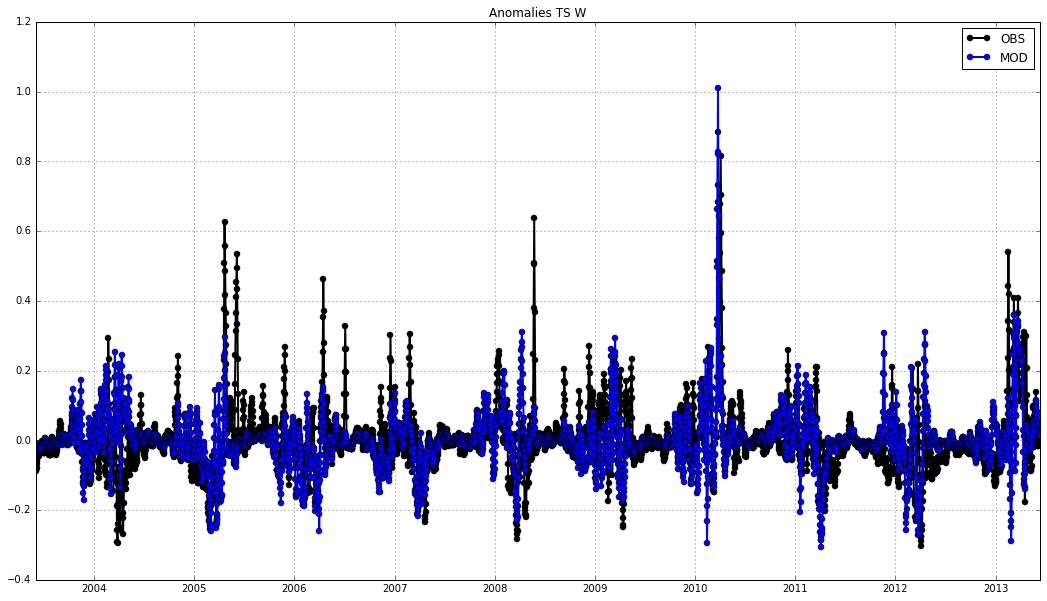

In [10]:
all_days = pd.date_range("20030101", freq='1D',periods=4015)

for region in region_names3:
    vars()['all_arr_'+region] = []

    for year in year_list:
        temp_arr = vars()['anom_df_'+region][str(year)]
        vars()['all_arr_'+region] = np.append(vars()['all_arr_'+region], temp_arr)
        
#for region in region_names4:
for region in region_names2: # 12/07
    plt.figure(figsize=[18,10])
    plt.plot(all_days, vars()['all_arr_'+region], '-ok', label = 'OBS', linewidth=2)
    plt.plot(all_days, vars()['all_arr_'+region+'_MOD'], '-ob', label = 'MOD', linewidth=2)  
    plt.grid(True)
    plt.legend()
    plt.title('Anomalies TS ' + region)

In [11]:
# Testing trends
import scipy.stats as scp_stats

In [21]:
# test
scp_stats.spearmanr(all_arr_ALL_MED_MOD)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [12]:
np.shape(all_days) # (4015,)
nb_days = np.arange(1,4016)
np.shape(nb_days)

(4015,)

In [14]:
# ALL_MED
test = scp_stats.spearmanr(all_arr_ALL_MED, nb_days)
print 'correlation =', np.round(test[0],2), '; p-value =', test[1] 
# correlation = -0.01 ; p-value = 0.626889967063
# NO TREND

correlation = -0.01 ; p-value = 0.626889967063


In [15]:
# ALL_MED_MOD
test = scp_stats.spearmanr(all_arr_ALL_MED_MOD, nb_days)
print 'correlation =', np.round(test[0],2), '; p-value =', test[1] 
# correlation = 0.06 ; p-value = 7.16454938233e-05
# CORRELATION, SMALL

correlation = 0.06 ; p-value = 7.16454938233e-05


In [20]:
# ALL_MED vs ALL_MED_MOD
test = scp_stats.spearmanr(all_arr_ALL_MED, all_arr_ALL_MED_MOD)
print 'correlation =', np.round(test[0],2), '; p-value =', test[1] 
# correlation = 0.67 ; p-value = 0.0
# CORRELATION

correlation = 0.67 ; p-value = 0.0


In [16]:
# ALG
test = scp_stats.spearmanr(all_arr_ALG, nb_days)
print 'correlation =', np.round(test[0],2), '; p-value =', test[1] 
# correlation = 0.0 ; p-value = 0.79765300522
# NO TREND

correlation = 0.0 ; p-value = 0.79765300522


In [17]:
# ALG_MOD
test = scp_stats.spearmanr(all_arr_ALG_MOD, nb_days)
print 'correlation =', np.round(test[0],2), '; p-value =', test[1] 
# correlation = 0.04 ; p-value = 0.00815917916065
# CORRELATION, SMALL

correlation = 0.04 ; p-value = 0.00815917916065


In [21]:
# ALG vs ALG_MOD
test = scp_stats.spearmanr(all_arr_ALG, all_arr_ALG_MOD)
print 'correlation =', np.round(test[0],2), '; p-value =', test[1] 
# correlation = 0.41 ; p-value = 1.33999289635e-159
# CORRELATION

correlation = 0.41 ; p-value = 1.33999289635e-159


In [ ]:
##########################################

In [7]:
### SAVE ### dev

# Here I just consider 1 case which is GOL_df to develop my script
series = pd.DataFrame(date_1d, columns=['date'])
series['var'] = GOL_df[0]
#upsampled = series_toresample.resample('D')
#interpolated = upsampled.interpolate(method='linear')
series['date'] = pd.to_datetime(series['date'],format='%Y-%m-%d')
#series = series['var'].dropna()
series['interp'] = pd.Series.interpolate(series['var']) # method=linear
series['mm'] = pd.DatetimeIndex(series['date']).month
series['yy'] = pd.DatetimeIndex(series['date']).year
series.head(12)

### SAVE ###

#man_df = np.zeros([365,12])
man_df = np.zeros([365,11])
man_df[:] = np.nan
#man_df = pd.DataFrame(man_df, columns=['day', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
#                                      '2011', '2012', '2013'])
man_df = pd.DataFrame(man_df, columns=['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
                                      '2011', '2012', '2013'])
#man_df['day'] = np.arange(1, 366)


year_list = np.arange(2004,2013)

all_len = np.zeros([len(year_list)])
all_len[:] = np.nan

for year in year_list:
    #print year
    our_df = series.loc[series['yy'] == year]
    all_len[year-year_list[0]] = len(our_df)
print ' '
print all_len

for year in year_list:
    temp_df = series.loc[series['yy'] == year]
    vars()['df_'+str(year)] = np.zeros([365])
    vars()['df_'+str(year)][:] = np.nan
    
    if all_len[year-year_list[0]] == 366:
        print year
        new_df = temp_df.drop(temp_df.index[59])
        vars()['df_'+str(year)][:] = new_df['interp']
        man_df[str(year)] = vars()['df_'+str(year)]
            
    else:
        vars()['df_'+str(year)][:] = temp_df['interp']
        man_df[str(year)] = vars()['df_'+str(year)]
        
year_list = [2003]
c = 0

for year in year_list:
    vars()['df_'+str(year)] = np.zeros([365])
    vars()['df_'+str(year)] = np.nan
    temp_df = series.loc[series['yy'] == year]
print np.shape(temp_df)

man_df['2003'][152:] = temp_df['interp']

year_list = [2013]
c = 0

for year in year_list:
    vars()['df_'+str(year)] = np.zeros([365])
    vars()['df_'+str(year)] = np.nan
    temp_df = series.loc[series['yy'] == year]
print np.shape(temp_df)

man_df['2013'][0:165] = temp_df['interp']
man_df.head()

# 05/06 Alex New tests
test_nanmean = np.zeros([365])
#test_nanmean[:] = np.nan
#test_nanmean = pd.DataFrame(test_nanmean)
#test_nanmean.head()
np.shape(test_nanmean)

for i in np.arange(1, len(man_df)+1):
    moy_temp = np.nanmean(man_df[i-1:i])
    #print 'moy_temp =', moy_temp
    #print i
    test_nanmean[i-1] = moy_temp
    moy_temp = None
    #print 'moy_temp =', moy_temp

#test_nanmean.head()

man_df['mean'] = test_nanmean
man_df['day'] = np.arange(1, 366)
man_df.head()
man_df.tail()

## NEW TEST ALEX

year_list = np.arange(2003,2014)
spectr_col = plt.get_cmap('nipy_spectral')
our_colormap = iter(spectr_col(np.linspace(0, 1, len(year_list))))
plt.figure(figsize=[18,10])

for year in year_list:    
    plt.plot(man_df['day'], man_df[str(year)], color=next(our_colormap),label=str(year), linewidth=2)
    plt.grid(True)
    plt.legend()
    
plt.plot(man_df['day'], man_df['mean'], '-or',label='mean', linewidth=4)

# Calcul anomalies

anom_df = np.zeros([365,11])
anom_df[:] = np.nan
anom_df = pd.DataFrame(anom_df, columns=['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
                                      '2011', '2012', '2013'])

year_list = np.arange(2003,2014)

for year in year_list:
    for d in np.arange(0,365):
        if np.isnan(man_df[str(year)][d]) == False:
            anom_temp = (man_df[str(year)][d])-(man_df['mean'][d])
            anom_df[str(year)][d] = anom_temp
            anom_temp = None

(3666, 1)

In [45]:
anom_df_GOL.head() # OK!

2003      2004      2005      2006      2007      2008      2009      2010  \
0   NaN -0.024784 -0.050378 -0.012684  0.056286  0.083714  0.108908  0.120858   
1   NaN -0.018184 -0.054094 -0.019564  0.057192  0.069167  0.103919  0.111144   
2   NaN -0.015335 -0.050075 -0.031907  0.054347  0.078593  0.095179  0.097679   
3   NaN -0.017433 -0.045506 -0.043700  0.052053  0.088570  0.086990  0.084765   
4   NaN -0.019531 -0.040937 -0.055493  0.049759  0.098547  0.078801  0.071851   

       2011      2012      2013  
0 -0.212792  0.069968 -0.139098  
1 -0.204044  0.059721 -0.105256  
2 -0.199045  0.045723 -0.075163  
3 -0.193496  0.032276 -0.044520  
4 -0.187947  0.018829 -0.013877

In [91]:
anom_df.head()

2003      2004      2005      2006      2007      2008      2009      2010  \
0   NaN -0.024784 -0.050378 -0.012684  0.056286  0.083714  0.108908  0.120858   
1   NaN -0.018184 -0.054094 -0.019564  0.057192  0.069167  0.103919  0.111144   
2   NaN -0.015335 -0.050075 -0.031907  0.054347  0.078593  0.095179  0.097679   
3   NaN -0.017433 -0.045506 -0.043700  0.052053  0.088570  0.086990  0.084765   
4   NaN -0.019531 -0.040937 -0.055493  0.049759  0.098547  0.078801  0.071851   

       2011      2012      2013  
0 -0.212792  0.069968 -0.139098  
1 -0.204044  0.059721 -0.105256  
2 -0.199045  0.045723 -0.075163  
3 -0.193496  0.032276 -0.044520  
4 -0.187947  0.018829 -0.013877

In [46]:
man_df_GOL.head() # OK!

2003      2004      2005      2006      2007      2008      2009      2010  \
0   NaN  0.305438  0.279844  0.317538  0.386508  0.413936  0.439130  0.451080   
1   NaN  0.311879  0.275970  0.310500  0.387255  0.399230  0.433982  0.441207   
2   NaN  0.318320  0.283580  0.301748  0.388002  0.412248  0.428834  0.431334   
3   NaN  0.319263  0.291190  0.292996  0.388749  0.425266  0.423686  0.421461   
4   NaN  0.320207  0.298800  0.284244  0.389496  0.438284  0.418538  0.411588   

      2011      2012      2013      mean  day  
0  0.11743  0.400190  0.191124  0.330222    1  
1  0.12602  0.389784  0.224808  0.330064    2  
2  0.13461  0.379378  0.258492  0.333655    3  
3  0.14320  0.368972  0.292176  0.336696    4  
4  0.15179  0.358566  0.325860  0.339737    5

In [92]:
man_df.head()

2003      2004      2005      2006      2007      2008      2009      2010  \
0   NaN  0.305438  0.279844  0.317538  0.386508  0.413936  0.439130  0.451080   
1   NaN  0.311879  0.275970  0.310500  0.387255  0.399230  0.433982  0.441207   
2   NaN  0.318320  0.283580  0.301748  0.388002  0.412248  0.428834  0.431334   
3   NaN  0.319263  0.291190  0.292996  0.388749  0.425266  0.423686  0.421461   
4   NaN  0.320207  0.298800  0.284244  0.389496  0.438284  0.418538  0.411588   

      2011      2012      2013      mean  day  
0  0.11743  0.400190  0.191124  0.330222    1  
1  0.12602  0.389784  0.224808  0.330064    2  
2  0.13461  0.379378  0.258492  0.333655    3  
3  0.14320  0.368972  0.292176  0.336696    4  
4  0.15179  0.358566  0.325860  0.339737    5

In [48]:
region_names4

['ALL_MED', 'W', 'GOL']

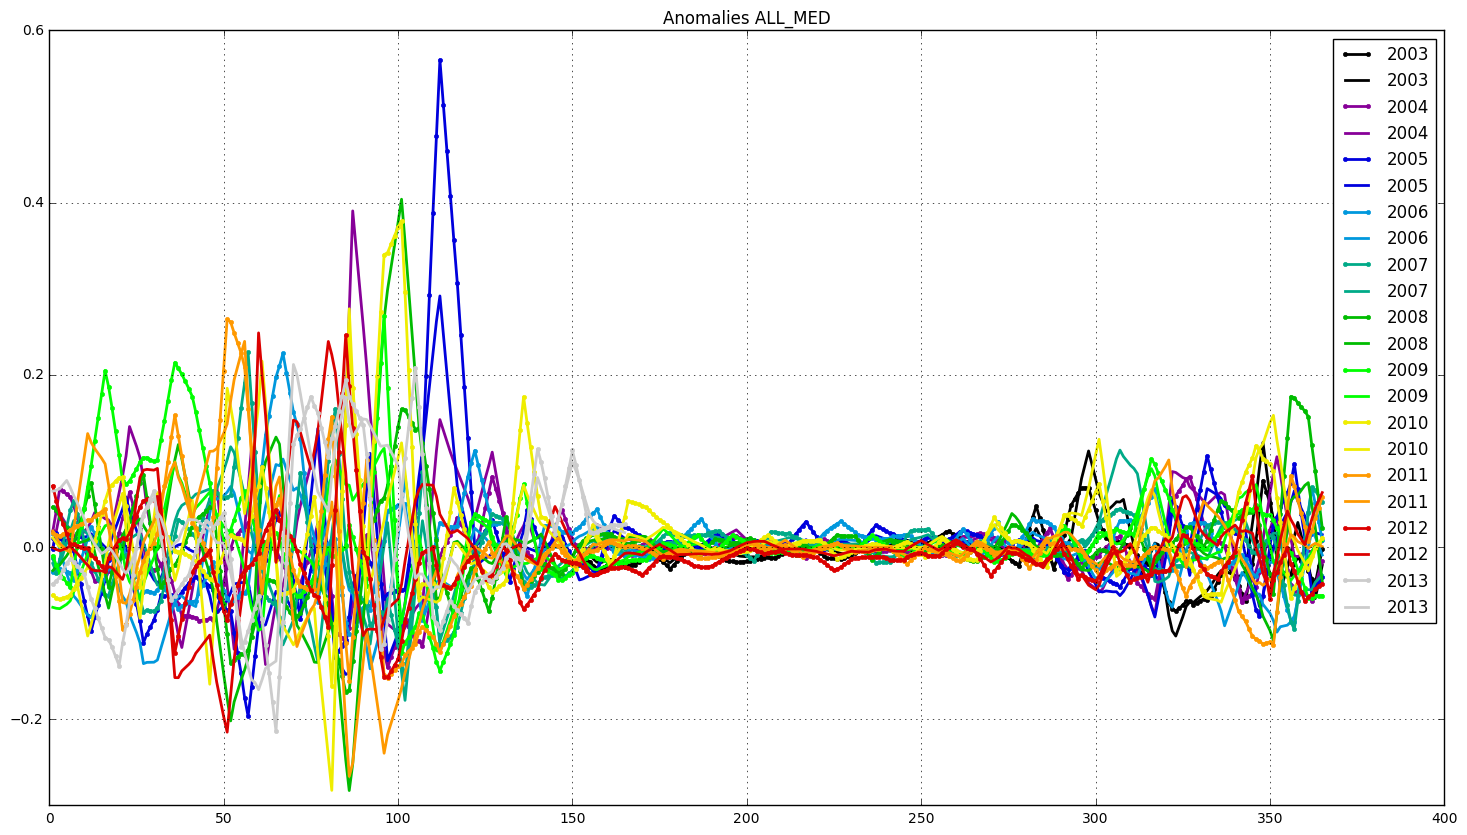

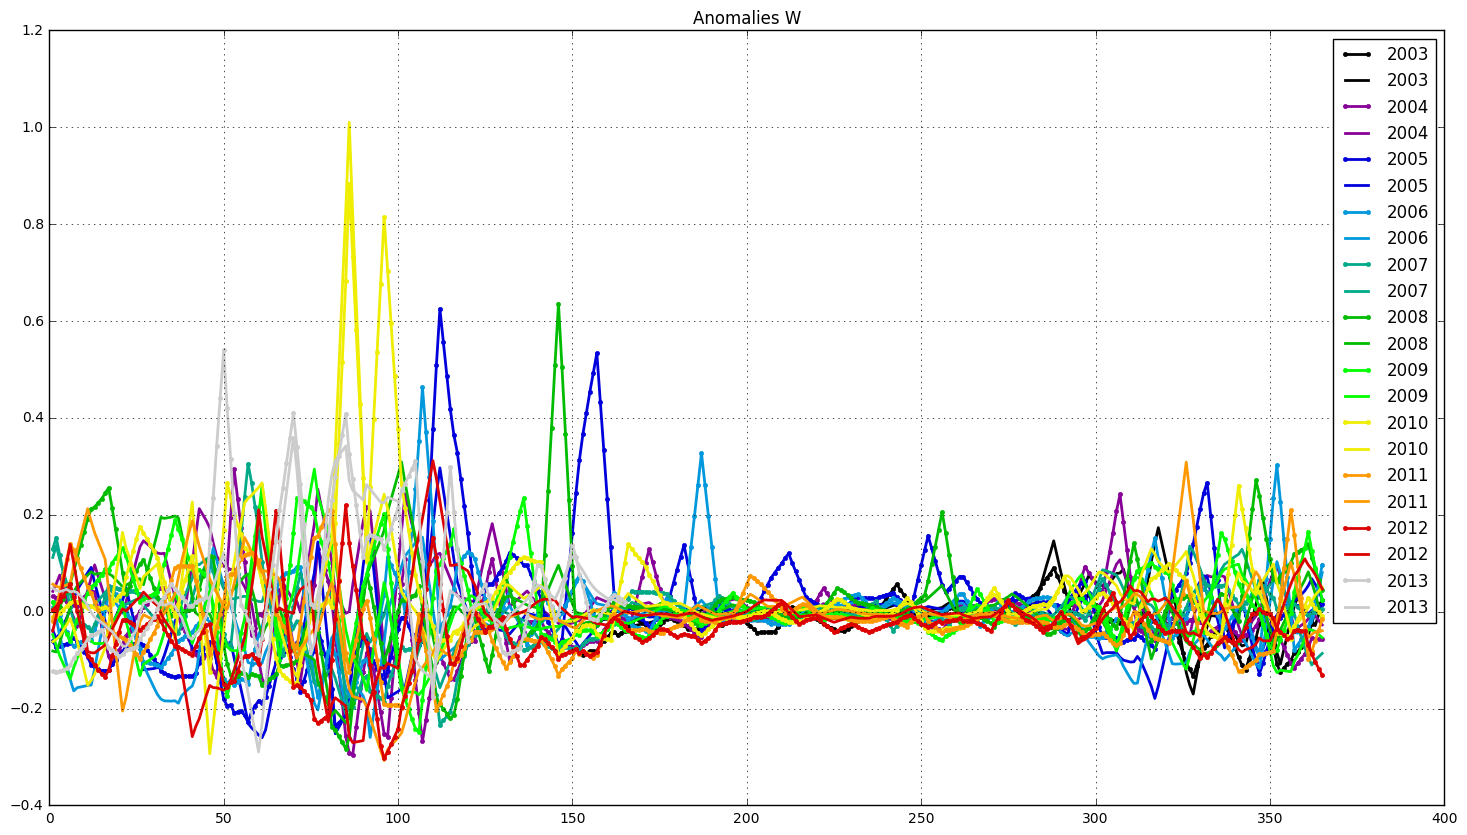

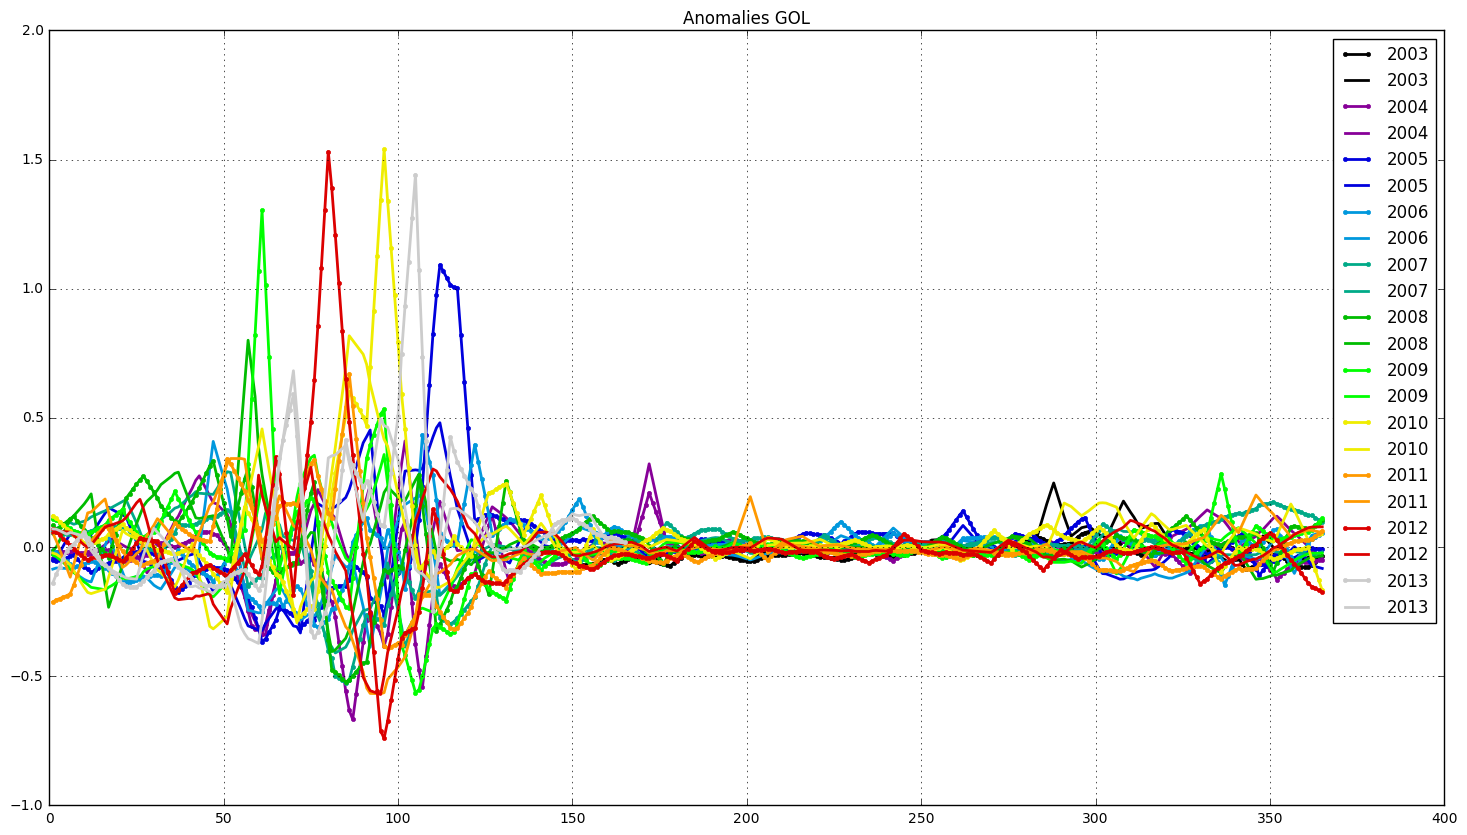

In [50]:
for region in region_names4:
    year_list = np.arange(2003,2014)
    spectr_col = plt.get_cmap('nipy_spectral')
    our_colormap = iter(spectr_col(np.linspace(0, 1, len(year_list))))
    plt.figure(figsize=[18,10])

    for year in year_list:    
        temp_col = next(our_colormap)
        plt.plot(vars()['man_df_'+region]['day'], vars()['anom_df_'+region][str(year)], color=temp_col,label=str(year), linewidth=2, marker='.')
        plt.plot(vars()['man_df_'+region]['day'], vars()['anom_df_'+region+'_MOD'][str(year)], color=temp_col,label=str(year), linewidth=2)
        plt.grid(True)
        plt.legend()
    plt.title('Anomalies '+region)

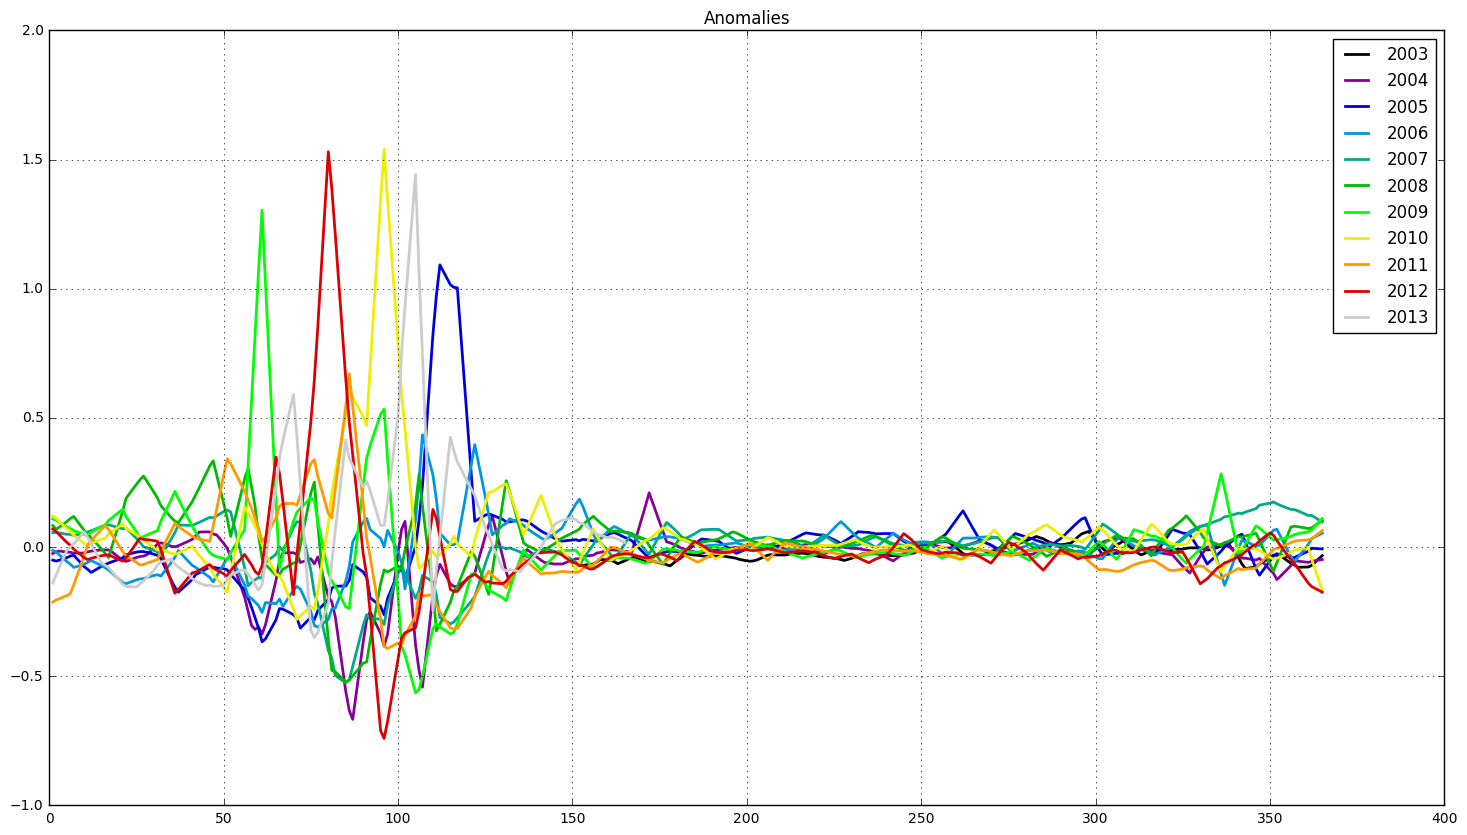

In [20]:
year_list = np.arange(2003,2014)
spectr_col = plt.get_cmap('nipy_spectral')
our_colormap = iter(spectr_col(np.linspace(0, 1, len(year_list))))
plt.figure(figsize=[18,10])

for year in year_list:    
    plt.plot(man_df['day'], anom_df[str(year)], color=next(our_colormap),label=str(year), linewidth=2)
    plt.grid(True)
    plt.legend()
plt.title('Anomalies')

In [39]:
all_arr = []

for year in year_list:
    temp_arr = anom_df[str(year)]
    all_arr = np.append(all_arr, temp_arr)

np.shape(all_arr)

(4015,)

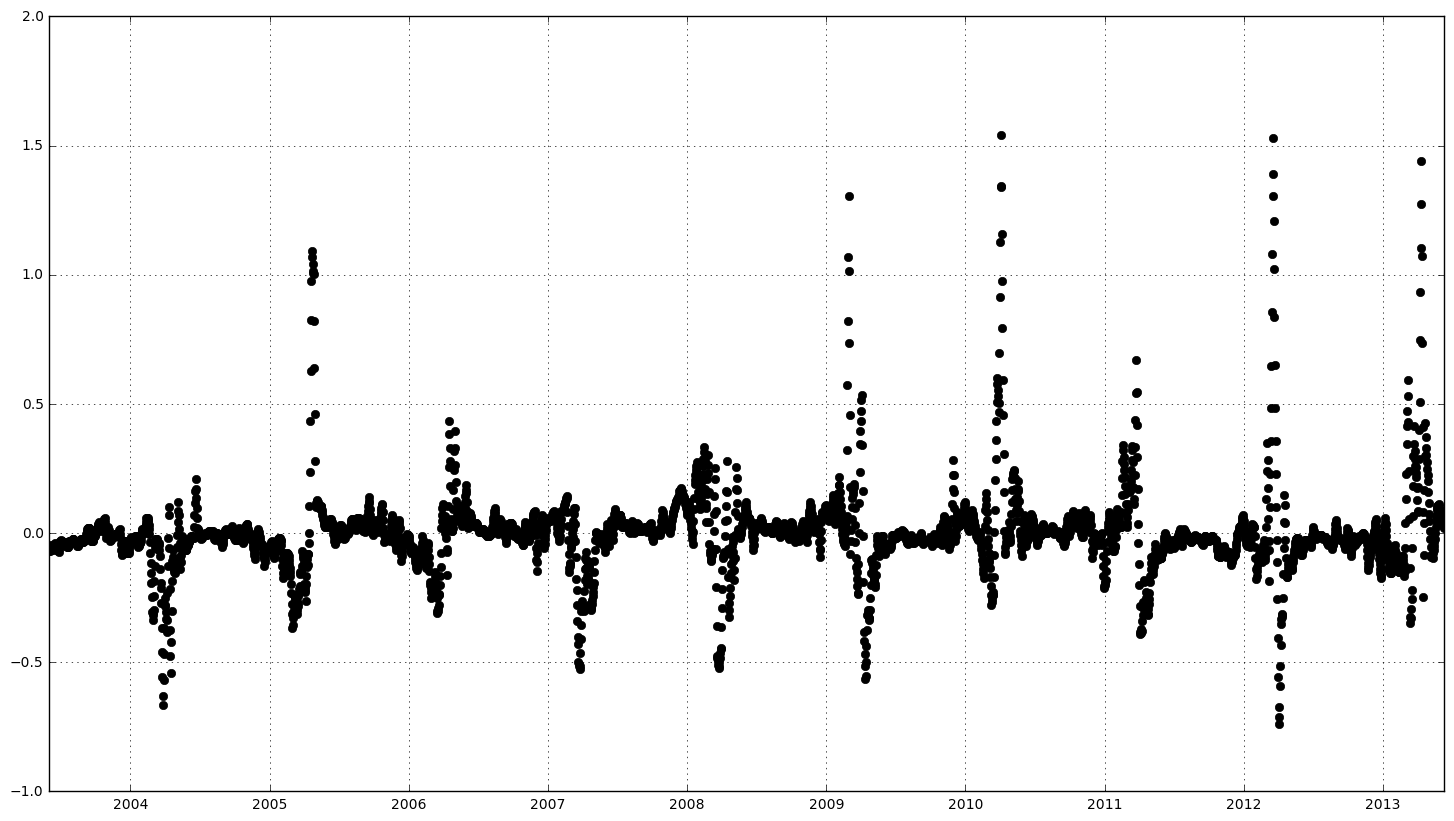

In [40]:
all_days = pd.date_range("20030101", freq='1D',periods=4015)
plt.figure(figsize=[18,10])
plt.plot(all_days, all_arr, 'ok')     
plt.grid(True)
#plt.legend()

In [50]:
np.nansum(all_arr[i], curr_cs)

1.0924895000000001

In [55]:
test_cs = np.cumsum(all_arr)

In [58]:
test_cs[1000:1065]

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [60]:
new_arr = np.nan_to_num(all_arr)


In [62]:
new_arr[150:165]

array([ 0.        ,  0.        , -0.07062891, -0.0687627 , -0.06689648,
       -0.06552318, -0.05709442, -0.0477423 , -0.04866127, -0.04958024,
       -0.05106612, -0.05626382, -0.06411382, -0.05868345, -0.05325309])

In [63]:
test_cs = np.cumsum(new_arr)

In [64]:
test_cs[150:165]

array([ 0.        ,  0.        , -0.07062891, -0.13939161, -0.20628809,
       -0.27181127, -0.3289057 , -0.376648  , -0.42530927, -0.47488952,
       -0.52595564, -0.58221945, -0.64633327, -0.70501673, -0.75826982])

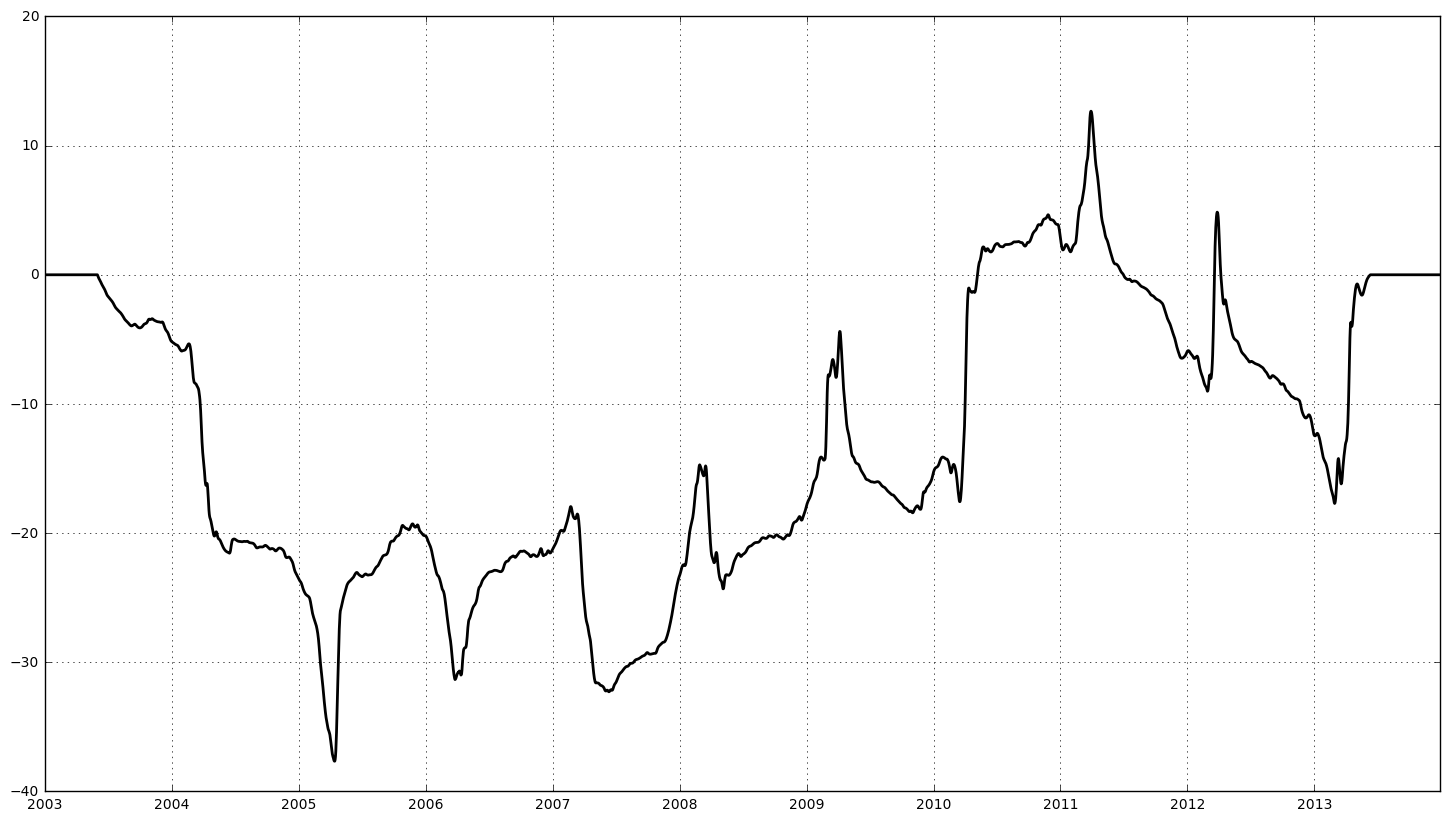

In [67]:
plt.figure(figsize=[18,10])
plt.plot(all_days, test_cs, '-k', linewidth=2)   
#plt.plot(all_days, all_arr, '-r', linewidth=2)   
plt.grid(True)

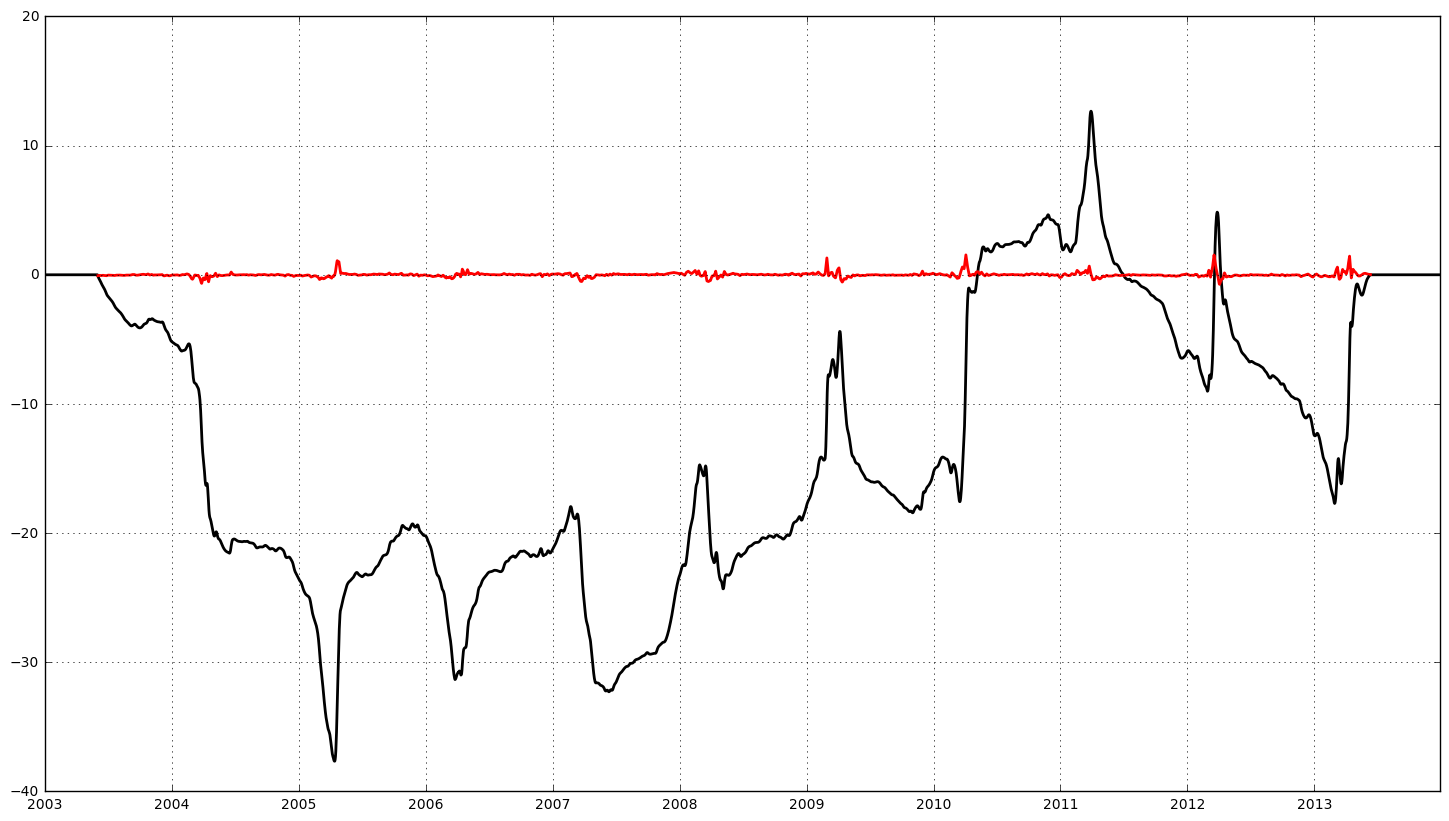

In [68]:
plt.figure(figsize=[18,10])
plt.plot(all_days, test_cs, '-k', linewidth=2)   
plt.plot(all_days, all_arr, '-r', linewidth=2)   
plt.grid(True)

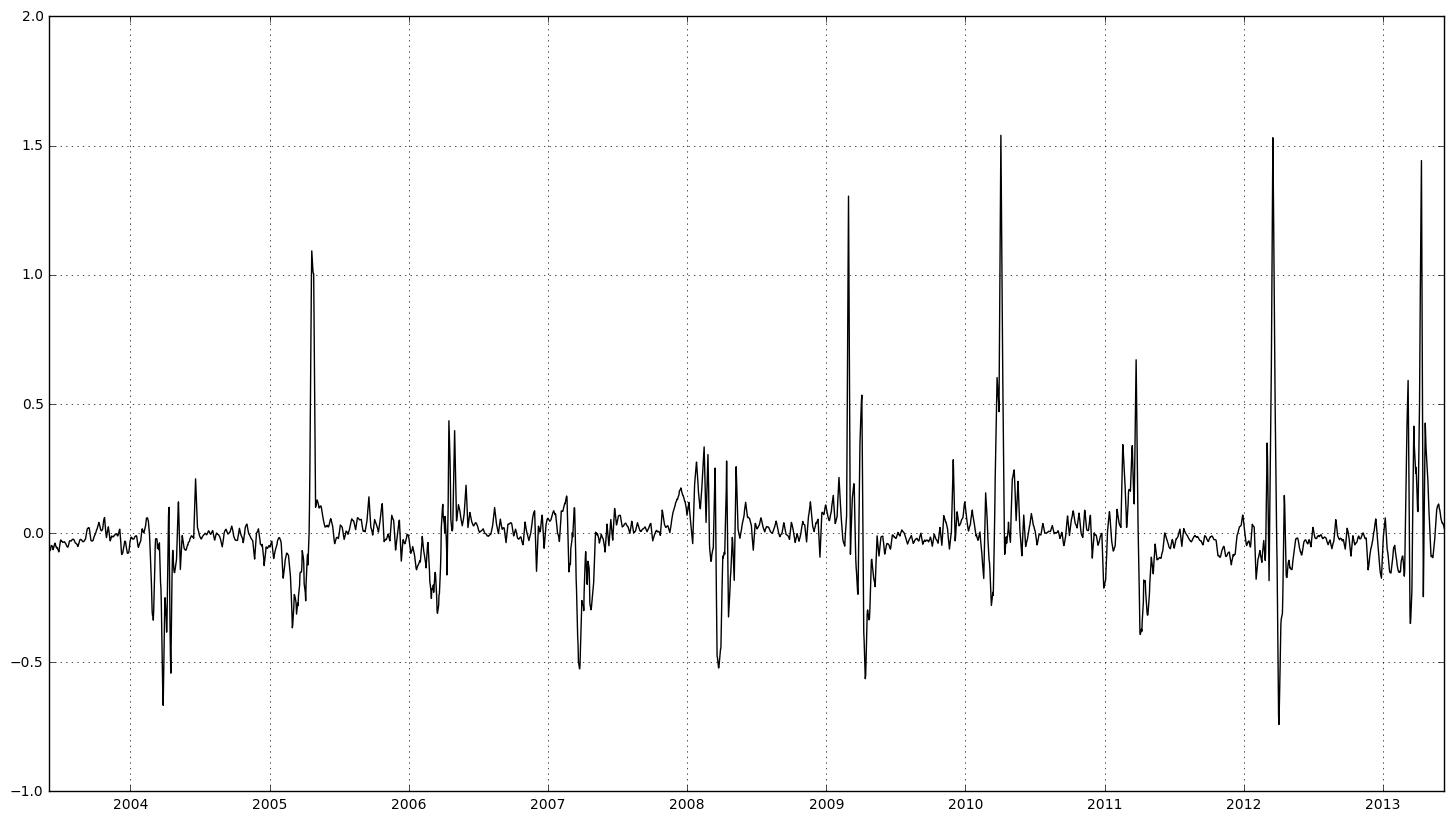

In [25]:
all_days = pd.date_range("20030101", freq='1D',periods=4015)
plt.figure(figsize=[18,10])
plt.plot(all_days, all_arr, '-k')    
plt.plot(all_days, test_cs, 'ob')  
plt.grid(True)
#plt.legend()

In [31]:
test_cs[150:250]

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan])